In [3]:
import matplotlib.pyplot as plt
import networkx as nx

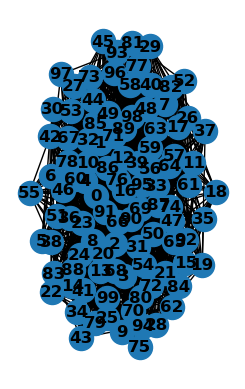

In [2]:
ER_1 = nx.erdos_renyi_graph(100,0.3)  #Creating an ER graph with N = 100 and p = 0.3
subax1 = plt.subplot(121)
nx.draw(ER_1, with_labels=True, font_weight='bold')

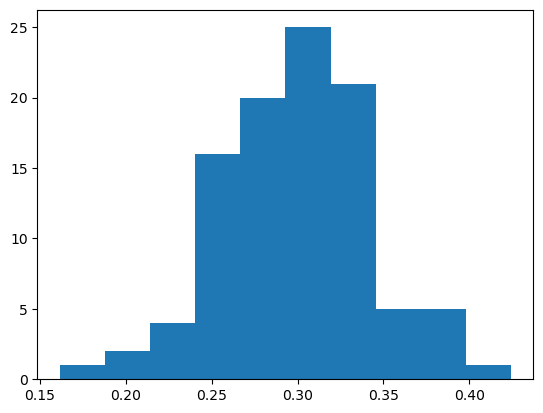

In [4]:
ER_1 = nx.erdos_renyi_graph(100,0.3)  #Creating an ER graph with N = 100 and p = 0.3
degreeCentralities = nx.degree_centrality(ER_1)
plt.hist(list(degreeCentralities.values()))  # Plotting degree centrality distribution
plt.show()

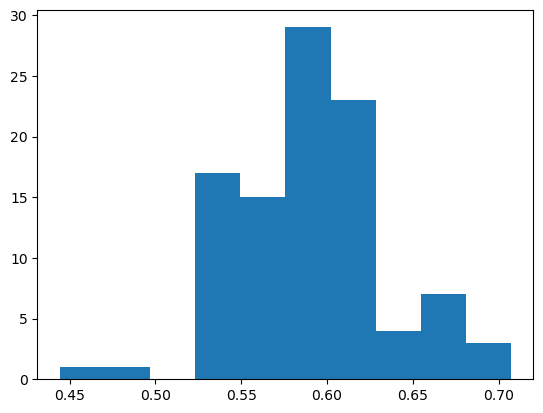

In [5]:
ER_2 = nx.erdos_renyi_graph(100,0.6)  #Creating an ER graph with N = 100 and p = 0.6
degreeCentralities = nx.degree_centrality(ER_2)
plt.hist(list(degreeCentralities.values()))  # Plotting degree centrality distribution
plt.show()


# **Why does degree centrality distribution changes?**
Before commenting on why degree centrality distribution changes, let's first state what degree centrality means. The degree centrality for a node v is the fraction of nodes it is connected to. Thus, the more number of edges a node has, the higher its degree centrality is.(See: [Link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html))

Given this definition, we can conclude that degree centrality for a node v can increase 

*   if number of nodes in the graph decreases without any decrease in number of edges of v, or
*   if number of edges of v increases without any increase in number of nodes in the graph. 

<br>

**Observations:** Based on these information, let's analyze histograms of $ER_1$ and $ER_2$. We can easily see that both plots look like normal distribution pattern. It is expected since these are Erdos-Renyi graphs. However, degree centrality values are different in two histograms. (See x-axis values). The plot makes peak around 0.30 for $ER_1$ whereas this value is ~0.60 for $ER_2$. This means that the most common degree centrality value among nodes of $ER_1$ is 0.30 while it is 0.60 for nodes of $ER_2$. Moreover, the least degree centrality value in $ER_1$ is less than 0.10 whereas it is greater than 0.45 for $ER_2$.

<br>

**Reasoning:** Based on our observations, degree centrality values of nodes are higher for $ER_2$. In our implementation, both graphs has 100 nodes. However, in the first graph $ER_1$, edge probability is 0.3 whereas it is 0.6 in the second graph $ER_2$. Therefore, it is expected that number of edges for a node will be greater in the second graph. Since number of nodes is the same for both graphs, it is more probable for a node to has higher degree centrality in the second graph.


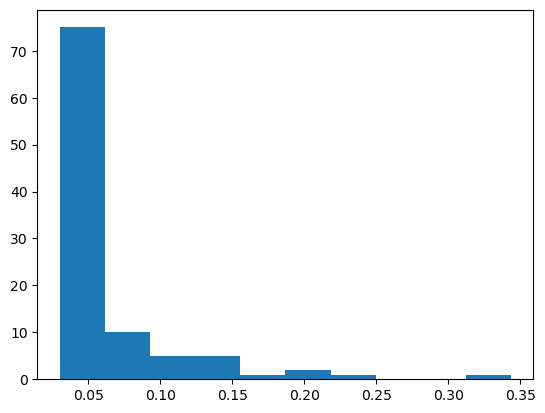

In [6]:
BA = nx.barabasi_albert_graph(n= 100,m=3)
degreeCentralities = nx.degree_centrality(BA)
plt.hist(list(degreeCentralities.values()))  # Plotting degree centrality distribution
plt.show()

# **Why does the degree centrality distribution change between these 2 random graph generators?**

When we compare degree centrality distributions of these 2 graph generators, we can easily see that Erdos-Renyi graph has a distribution looks like normal distribution. In Barabasi-Albert graph, the histogram shows that there is a small number of nodes with high degree centrality, and most of other nodes have very small degree values. I.e. A few nodes take most of edges. (It is Power Law Distribution).

In order to understand the reason of this difference, we should understand how these two random graphs are generated.


*   **Barabasi-Albert Graph:** Starts with $m$ nodes and no edge initially. New nodes are added to the graph one at a time. Each new node is connected to $m$ existing nodes with a probability that is proportional to the number of links that the existing nodes already have. I.e.  New nodes will probably be attached to existing nodes with high degree. (See: [Link](https://networkx.org/documentation/networkx-1.9.1/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html))
*   **Erdos-Renyi Graph:** The probability of an edge existing between two nodes is the same for any pair of nodes in the graph.(See: [Link](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html))

Considering these information, the difference makes sense. Barabasi-Albert has a few nodes with high degree values, and most of its nodes have very few edges. In Erdos-Renyi graph, degrees of most nodes are about the same as expected. 
